In [1]:
# Early WIP

In [3]:
# V 1.13
# Standard Imports
import pandas as pd
import numpy as np
from zipfile import ZipFile

# Plotting 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from bokeh.plotting import figure, output_notebook, show, output_file
import seaborn as sns

output_notebook()
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize

# Pandas Setup
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# Colour Management
MC = '#242a49'  # Main
SC = '#ededed'  # Secondary
TC = 'red'  # Tertiary 

colors = ['#202540', '#17b5ff', 'red', 'pink', '#443857', '#bed6f7', '#144c4a']
cmap = mcolors.LinearSegmentedColormap.from_list('n', ['red', 'white', MC])
cmap2 = mcolors.LinearSegmentedColormap.from_list('n', ['white', MC])
boxplot_params = dict(
    patch_artist=True,
    boxprops=dict(facecolor=SC, color=MC),
    capprops=dict(color=MC, linewidth=2),
    whiskerprops=dict(color=MC),
    flierprops=dict(color=MC, markeredgecolor=MC),
    medianprops=dict(color='red', linewidth=2),
)

#Pyplot Setup
plt.rcParams.update({
    'font.family': 'monospace',
    'font.size': 10,
    'figure.figsize': (12, 6),
    'axes.titlesize': 16.0,
    'axes.facecolor': 'none',
    'axes.formatter.useoffset': False,  # Scientific notation
    'grid.color': SC,
    'figure.frameon': False,
#     'axes.grid': True,

})


Loading BokehJS ...

In [4]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'none',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.

In [54]:
# Additional imports
from bokeh.layouts import layout, widgetbox
from bokeh.models import ColumnDataSource, HoverTool, BoxZoomTool, ResetTool, PanTool
from bokeh.models.widgets import Slider, Select, TextInput, Div
from bokeh.models import WheelZoomTool, SaveTool, LassoSelectTool
from bokeh.io import curdoc
from functools import lru_cache

In [55]:
df = pd.read_csv(
    ZipFile('data/app-store.zip').open('AppleStore.csv'), 
#     index_col=0)
)
df.head(3)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.00,4.50,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.00,3.50,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.50,4.50,5.0.0,4+,Weather,37,5,3,1


In [56]:
# Drop unnamed columns
df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)

In [57]:
df.shape

(7197, 16)

In [58]:
old_cols = df.columns

In [59]:
old_cols

Index(['id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [60]:
# Changing columns to 'camel case'
new_cols = []
for col in old_cols:
    col = col.replace('_', ' ')
    col = col.replace('.', ' ')
    col = col.title()
    col = col.replace(' ', '')
    new_cols.append(col)
new_cols

['Id',
 'TrackName',
 'SizeBytes',
 'Currency',
 'Price',
 'RatingCountTot',
 'RatingCountVer',
 'UserRating',
 'UserRatingVer',
 'Ver',
 'ContRating',
 'PrimeGenre',
 'SupDevicesNum',
 'IpadscUrlsNum',
 'LangNum',
 'VppLic']

In [61]:
"""
"id" : App ID
"track_name": App Name
"size_bytes": Size (in Bytes)
"currency": Currency Type
"price": Price amount
"rating_count_tot": User Rating counts (for all version)
"rating_count_ver": User Rating counts (for current version)
"user_rating" : Average User Rating value (for all version)
"user_rating_ver": Average User Rating value (for current version)
"ver" : Latest version code
"cont_rating": Content Rating
"prime_genre": Primary Genre
"sup_devices.num": Number of supporting devices
"ipadSc_urls.num": Number of screenshots showed for display
"lang.num": Number of supported languages
"vpp_lic": Vpp Device Based Licensing Enabled
"""

'\n"id" : App ID\n"track_name": App Name\n"size_bytes": Size (in Bytes)\n"currency": Currency Type\n"price": Price amount\n"rating_count_tot": User Rating counts (for all version)\n"rating_count_ver": User Rating counts (for current version)\n"user_rating" : Average User Rating value (for all version)\n"user_rating_ver": Average User Rating value (for current version)\n"ver" : Latest version code\n"cont_rating": Content Rating\n"prime_genre": Primary Genre\n"sup_devices.num": Number of supporting devices\n"ipadSc_urls.num": Number of screenshots showed for display\n"lang.num": Number of supported languages\n"vpp_lic": Vpp Device Based Licensing Enabled\n'

In [62]:
new_cols = [
    'Id',
     'Name',
     'SizeBytes',
     'Currency',
     'Price',
     'RatingCountTotal',
     'RatingCountVersion',
     'UserRating',
     'UserRatingVersion',
     'Version',
     'ContentRating',
     'PrimeGenre',
     'SupportedDevicesNum',
     'IpadScreensNum', 
     'LangNum',
     'VppLic'
]

In [63]:
# Sanity check
list(zip(old_cols, new_cols))

[('id', 'Id'),
 ('track_name', 'Name'),
 ('size_bytes', 'SizeBytes'),
 ('currency', 'Currency'),
 ('price', 'Price'),
 ('rating_count_tot', 'RatingCountTotal'),
 ('rating_count_ver', 'RatingCountVersion'),
 ('user_rating', 'UserRating'),
 ('user_rating_ver', 'UserRatingVersion'),
 ('ver', 'Version'),
 ('cont_rating', 'ContentRating'),
 ('prime_genre', 'PrimeGenre'),
 ('sup_devices.num', 'SupportedDevicesNum'),
 ('ipadSc_urls.num', 'IpadScreensNum'),
 ('lang.num', 'LangNum'),
 ('vpp_lic', 'VppLic')]

In [64]:
df.columns = new_cols

In [65]:
df.head(2)

,Id,Name,SizeBytes,Currency,Price,RatingCountTotal,RatingCountVersion,UserRating,UserRatingVersion,Version,ContentRating,PrimeGenre,SupportedDevicesNum,IpadScreensNum,LangNum,VppLic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.00,4.50,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.00,3.50,8.2.2,4+,Productivity,37,5,23,1


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
Id                     7197 non-null int64
Name                   7197 non-null object
SizeBytes              7197 non-null int64
Currency               7197 non-null object
Price                  7197 non-null float64
RatingCountTotal       7197 non-null int64
RatingCountVersion     7197 non-null int64
UserRating             7197 non-null float64
UserRatingVersion      7197 non-null float64
Version                7197 non-null object
ContentRating          7197 non-null object
PrimeGenre             7197 non-null object
SupportedDevicesNum    7197 non-null int64
IpadScreensNum         7197 non-null int64
LangNum                7197 non-null int64
VppLic                 7197 non-null int64
dtypes: float64(3), int64(8), object(5)
memory usage: 899.7+ KB


In [39]:
df.ContentRating.value_counts()

4+     4433
12+    1155
9+      987
17+     622
Name: ContentRating, dtype: int64

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,"7,197.00","863,130,997.45","271,236,755.89","281,656,475.00","600,093,661.00","978,148,241.00","1,082,309,664.00","1,188,375,727.00"
SizeBytes,"7,197.00","199,134,453.83","359,206,913.54","589,824.00","46,922,752.00","97,153,024.00","181,924,864.00","4,025,969,664.00"
Price,"7,197.00",1.73,5.83,0.00,0.00,0.00,1.99,299.99
RatingCountTotal,"7,197.00","12,892.91","75,739.41",0.00,28.00,300.00,"2,793.00","2,974,676.00"
RatingCountVersion,"7,197.00",460.37,"3,920.46",0.00,1.00,23.00,140.00,"177,050.00"
UserRating,"7,197.00",3.53,1.52,0.00,3.50,4.00,4.50,5.00
UserRatingVersion,"7,197.00",3.25,1.81,0.00,2.50,4.00,4.50,5.00
SupportedDevicesNum,"7,197.00",37.36,3.74,9.00,37.00,37.00,38.00,47.00
IpadScreensNum,"7,197.00",3.71,1.99,0.00,3.00,5.00,5.00,5.00
LangNum,"7,197.00",5.43,7.92,0.00,1.00,1.00,8.00,75.00


In [43]:
# New Features
df['SizeMB'] = df.SizeBytes / 1024

In [113]:
# Outliers
df = df[df.Price < 50]

In [73]:
# Free vs Paid
print('There are {} free apps vs {} paid.'.format(
    df[df.Price == 0].Price.count(),
    df[df.Price != 0].Price.count()))

There are 4056 free apps vs 3141 paid.


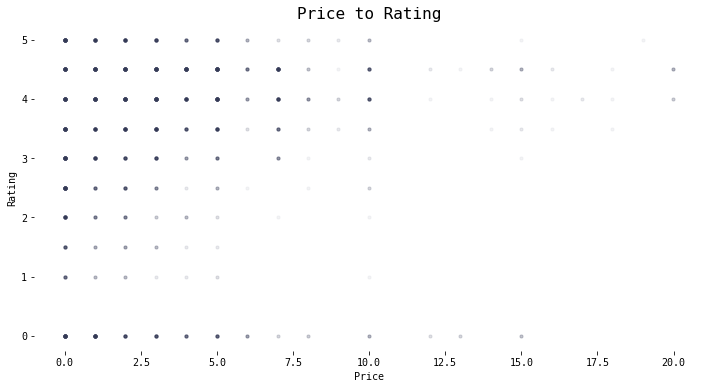

In [94]:
without_outliers = (df.Price < 20) 
plt.axes(frameon=False)
plt.scatter(
    df.Price[without_outliers], 
    df.UserRating[without_outliers], 
    color=MC, 
    s=10,
    alpha=.05
)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Price to Rating');

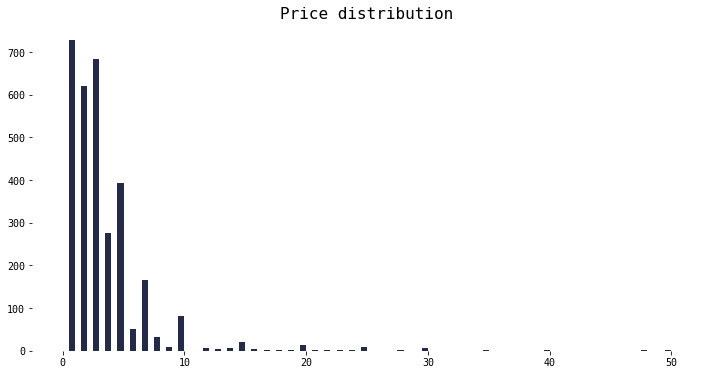

In [103]:
plt.axes(frameon=False)
plt.hist(df.Price[df.Price != 0], bins=100, color=MC, range=(0, 50));
plt.title('Price distribution');

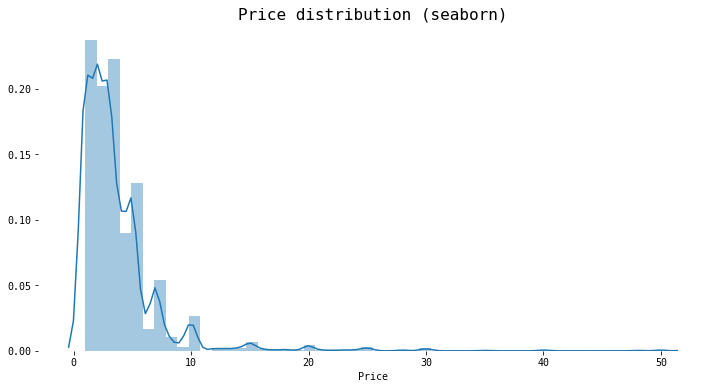

In [115]:
plt.axes(frameon=False)
sns.distplot(df.Price[df.Price != 0])
plt.title('Price distribution (seaborn)');

In [121]:
df.columns

Index(['Id', 'Name', 'SizeBytes', 'Currency', 'Price', 'RatingCountTotal',
       'RatingCountVersion', 'UserRating', 'UserRatingVersion', 'Version',
       'ContentRating', 'PrimeGenre', 'SupportedDevicesNum', 'IpadScreensNum',
       'LangNum', 'VppLic'],
      dtype='object')

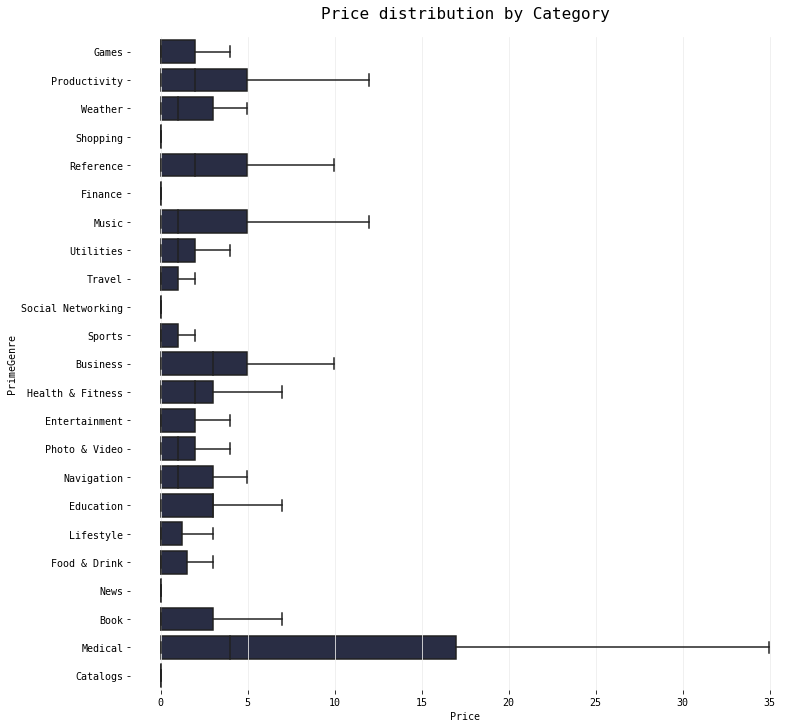

In [124]:
plt.figure(figsize=(12, 12))
plt.axes(frameon=False)
sns.boxplot(x='Price', y='PrimeGenre', data=df, showfliers=False, color=MC)
# plt.title('')
plt.grid(axis='x', color=SC)
plt.title('Price distribution by Category', y=1.02);

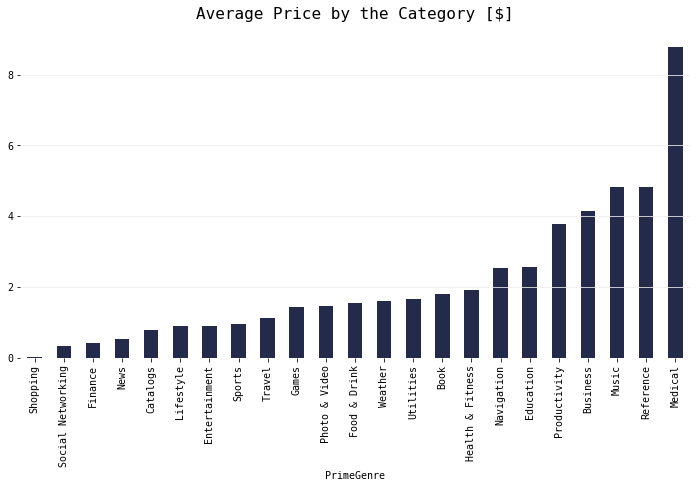

In [133]:
plt.axes(frameon=False)
df.groupby('PrimeGenre').Price.mean().sort_values().plot(kind='bar', color=MC)
plt.grid(axis='y')
plt.title('Average Price by the Category [$]', y=1.02);

In [144]:
# Size of the category in USD
df.groupby('PrimeGenre').Price.sum()
      

PrimeGenre
Book                  200.54
Business              231.64
Catalogs                7.99
Education           1,154.83
Entertainment         475.99
Finance                43.80
Food & Drink           97.80
Games               5,533.95
Health & Fitness      344.96
Lifestyle             127.50
Medical               201.85
Music                 667.29
Navigation            114.75
News                   38.83
Photo & Video         514.18
Productivity          670.85
Reference             309.56
Shopping                1.99
Social Networking      56.76
Sports                108.65
Travel                 90.75
Utilities             408.61
Weather               115.59
Name: Price, dtype: float64

In [149]:
df[(df.PrimeGenre == 'Book') & (df.Price !=0)].Price

301     3.99
396     6.99
536     2.99
765     1.99
853     9.99
1015    3.99
1029    5.99
1392    0.99
1444    2.99
1487    5.99
1686    1.99
1956    2.99
1978    5.99
2073    2.99
2258    5.99
2441    0.99
2949   27.99
3041    2.99
3045    4.99
3115    2.99
3406    2.99
3894    3.99
3965    3.99
3966    1.99
4021    3.99
4032    3.99
4320    1.99
4408    3.99
4646    3.99
4793    1.99
4916    3.99
4955    3.99
4961    3.99
5673    3.99
5674    3.99
5894    5.99
5964    5.99
5965    5.99
5966    5.99
5967    5.99
5984    0.99
6018    2.99
6095    2.99
6517    0.99
6833    1.99
7025    1.99
Name: Price, dtype: float64